In [1]:
import matplotlib
# matplotlib.use('nbagg')            # For interactive plotting. Doesn't play well with pandas plotting.
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

In [2]:
# List available datasets
# Also see http://www.statsmodels.org/dev/datasets/index.html

help(sm.datasets)

Help on package statsmodels.datasets in statsmodels:

NAME
    statsmodels.datasets - Datasets module

PACKAGE CONTENTS
    anes96 (package)
    cancer (package)
    ccard (package)
    china_smoking (package)
    co2 (package)
    committee (package)
    copper (package)
    cpunish (package)
    elnino (package)
    engel (package)
    fair (package)
    fertility (package)
    grunfeld (package)
    heart (package)
    interest_inflation (package)
    longley (package)
    macrodata (package)
    modechoice (package)
    nile (package)
    randhie (package)
    scotland (package)
    spector (package)
    stackloss (package)
    star98 (package)
    statecrime (package)
    strikes (package)
    sunspots (package)
    template_data
    tests (package)
    utils

FUNCTIONS
    check_internet(url=None)
        Check if internet is available
    
    clear_data_home(data_home=None)
        Delete all the content of the data home cache.
    
    get_data_home(data_home=None)
        Ret

In [2]:
# Load a dataset

ds1 = sm.datasets.co2.load_pandas()
type(ds1)                # tells you the type of the object: statsmodels.datasets.utils.Dataset
ds1.data.head()          # Dataset.data is a pandas DataFrame
ds1.data.info()          # Tells you about the pandas DataFrame


statsmodels.datasets.utils.Dataset

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
co2    2225 non-null float64
dtypes: float64(1)
memory usage: 35.7 KB


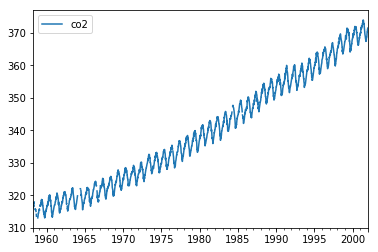

In [3]:
ds1.data.plot()          # pandas DataFrames have a plot method. 
                         # https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
plt.show()

In [4]:
# Get the US macroeconomic data 
ds2 = sm.datasets.macrodata.load_pandas()
USMacro = ds2.data
USMacro.info()
USMacro.head()
USMacro.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
year        203 non-null float64
quarter     203 non-null float64
realgdp     203 non-null float64
realcons    203 non-null float64
realinv     203 non-null float64
realgovt    203 non-null float64
realdpi     203 non-null float64
cpi         203 non-null float64
m1          203 non-null float64
tbilrate    203 non-null float64
unemp       203 non-null float64
pop         203 non-null float64
infl        203 non-null float64
realint     203 non-null float64
dtypes: float64(14)
memory usage: 22.3 KB


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [5]:
# Create a variable for year and quarter

USMacro[['year','quarter']] = USMacro[['year','quarter']].astype(int)       # Casting of columns

USMacro['yq'] = USMacro['year'].astype(str) + 'q'+ USMacro['quarter'].astype(str)  # String concatenation

USMacro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,yq
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,1959q1
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,1959q2
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,1959q3
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,1959q4
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,1960q1


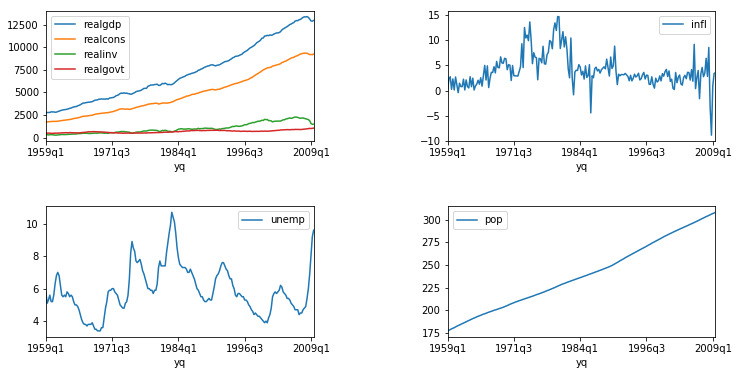

In [6]:
# Make plots using subplots functionality

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,6))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

_ = USMacro.plot(ax=axes[0,0],x='yq',y=['realgdp','realcons','realinv','realgovt'])

_ = USMacro.plot(ax=axes[0,1],x='yq',y='infl')

_ = USMacro.plot(ax=axes[1,0],x='yq',y='unemp')

_ = USMacro.plot(ax=axes[1,1],x='yq',y='pop')

plt.show()